继续上面的问题，我们希望找到下面这样的一个函数：

$$
y = 
\begin{cases}
1,\quad x \geq k \\ 
0,\quad x < k 
\end{cases}
$$

其中的 k 称为**决策边界**，当分数大于决策边界时，就预测考试通过，当分数低于决策边界时，就预测考试未通过。但是上面这样的分段函数无论是求导还是计算都不太方便，为了拟合这个函数，数据科学家们提出了下面的 **S 型函数**：

$$
y = \frac{1}{1 + e^{-x}}
$$

它的图形如下图所示：

![](../images/sigmoid.jpg)

这种 S 型形状的函数叫做 **Sigmoid 函数**，它的定义域是 $(-\infty, +\infty)$，值域却很好的限制在 (0, 1) 之间，这和我们要拟合的分类问题是一致的。单词 sigmoid 由 sigma 和后缀 -oid 合成而来，sigma 即希腊文第十八个字母 $\sigma$，通常用来指代字母 S，后缀 -oid 表示『像……的东西』，因此 Sigmoid 函数实际上是以函数的形状命名，表示一个像 S 型的函数。上面这个 Sigmoid 函数一般称之为 **逻辑函数**（logistic function，也有的地方叫做 **对数几率函数** 或 **对率函数**）。像这样的 S 型函数有很多，另一个常见的 Sigmoid 函数是 **双曲正切函数**（hyperbolic tangent function，简称为 **tanh 函数**）：

$$
y = tanh x = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

它也是神经网络中一个常用的激活函数。但我们这里只用逻辑函数来拟合前面提到的散点数据，在上面的逻辑函数中，$e$ 的指数是 $-x$，当我们稍微调整下这里的指数，改成 $-(2x-154)$，则有：

$$
y = \frac{1}{1 + e^{-(2x-154)}}
$$

画出这个图形，可以看到这个函数可以非常好的拟合我们的数据。

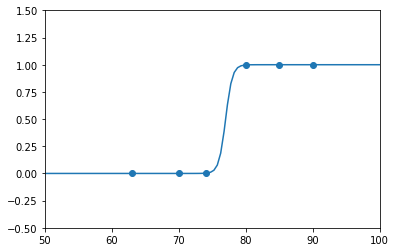

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(50, 100)
plt.ylim(-0.5, 1.5)

X = np.array([[80,1],[85,1],[74,0],[63,0],[90,1],[70,0]])
plt.scatter(X[:,0], X[:,1])

x = np.linspace(50, 100, 100)
y = 1/(1 + np.power(np.e, -(2*x-154)))
plt.plot(x, y)

plt.show()

我们把上面的逻辑函数记为 g(z)，即：

$$
g(z) = \frac{1}{1+e^{-z}}
$$

那么上面的拟合函数就可以写成：

$$
y = g(2x-154) = g(wx+b)
$$

也可以写成反函数的形式：

$$
g^{-1}(y) = wx+b
$$

可以发现这个式子和线性模型非常像，可以说，自变量 x 和 因变量 y 的逻辑函数的反函数呈线性关系。实际上，这里的 $g(\cdot)$ 通常称为**连接函数**（link function，或称为联系函数），它是一个单调可微的函数，通过连接函数得到的模型称为**广义线性模型**（generalized linear model）。

使用中学时的数学知识，可以推导出逻辑函数的反函数为：

$$
g^{-1}(y) = ln \frac{y}{1-y}
$$